## Entornos data science - Python

### Parte 2 

En esta segunda parte trabajaremos con un dataset de R que describe las características físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el paquete "ggplot2" con nombre "diamonds".

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
diamonds = sm.datasets.get_rdataset('diamonds', 'ggplot2')
diamonds = diamonds.data

In [24]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Calcula los valores máximo, mínimo y medio de la variable carat.

In [25]:
maximo_carat = diamonds['carat'].max()
minimo_carat = diamonds['carat'].min()
medio_carat = diamonds['carat'].mean()

print 'máximo carat:', maximo_carat
print 'mínimo carat:', minimo_carat
print 'medio carat:', medio_carat

máximo carat: 5.01
mínimo carat: 0.2
medio carat: 0.797939747868


Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria del mismo tamaño con puntos obtenidos de una distribución gamma con la misma media y desviación típica. Haz que la visualización sea más adecuada haciendo transparente uno de los histogramas utilizando el parámetro alpha.

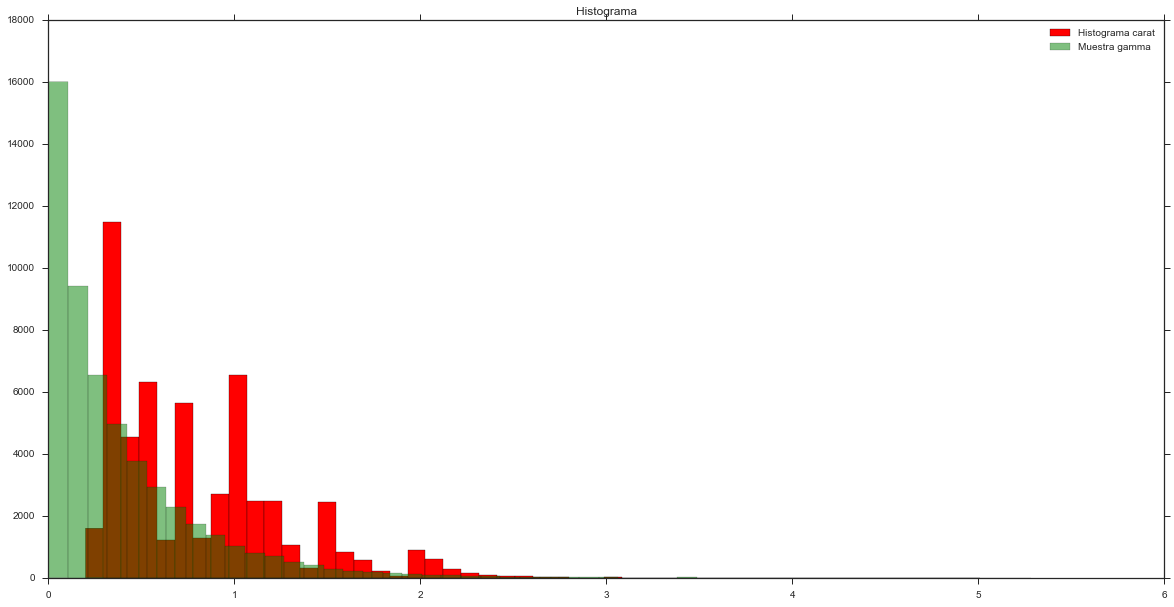

In [26]:
desv=diamonds['carat'].std()
muestra_gamma = np.random.gamma(medio_carat, desv, diamonds.carat.size)

%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(diamonds.carat, bins=50, color='red', label='Histograma carat')
plt.hist(muestra_gamma, bins=50,alpha=0.5,color='green', label='Muestra gamma')
plt.title('Histograma')
plt.legend()
plt.show()

Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.

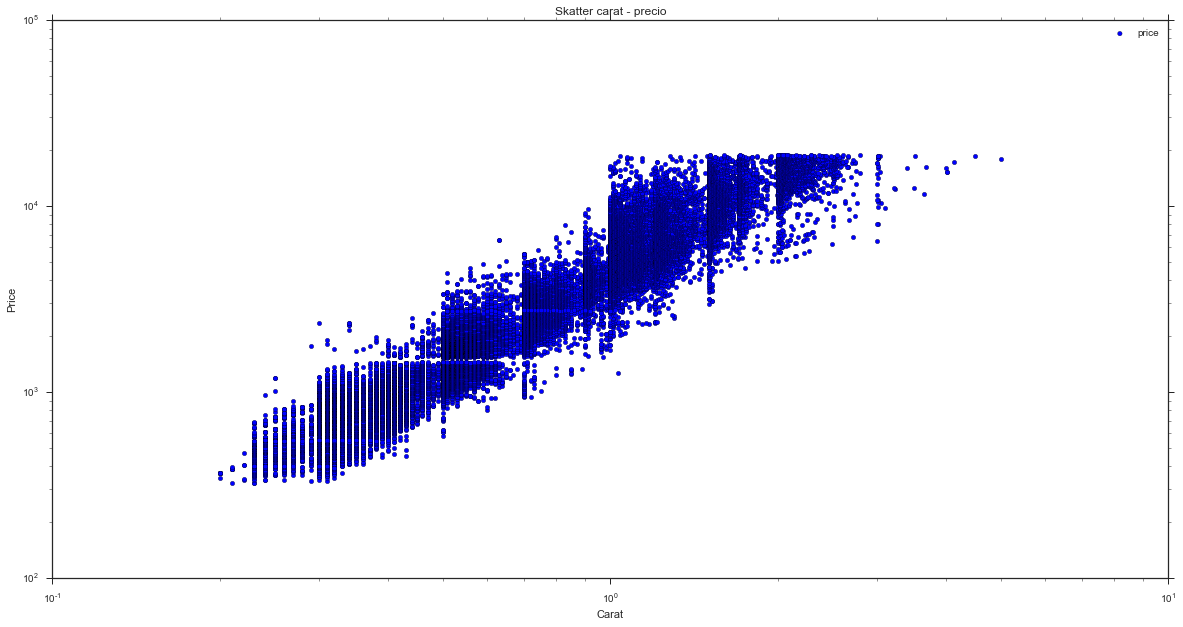

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(diamonds['carat'],diamonds['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.semilogx()
plt.semilogy()
plt.title('Skatter carat - precio')
plt.legend()
plt.show()

Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1".

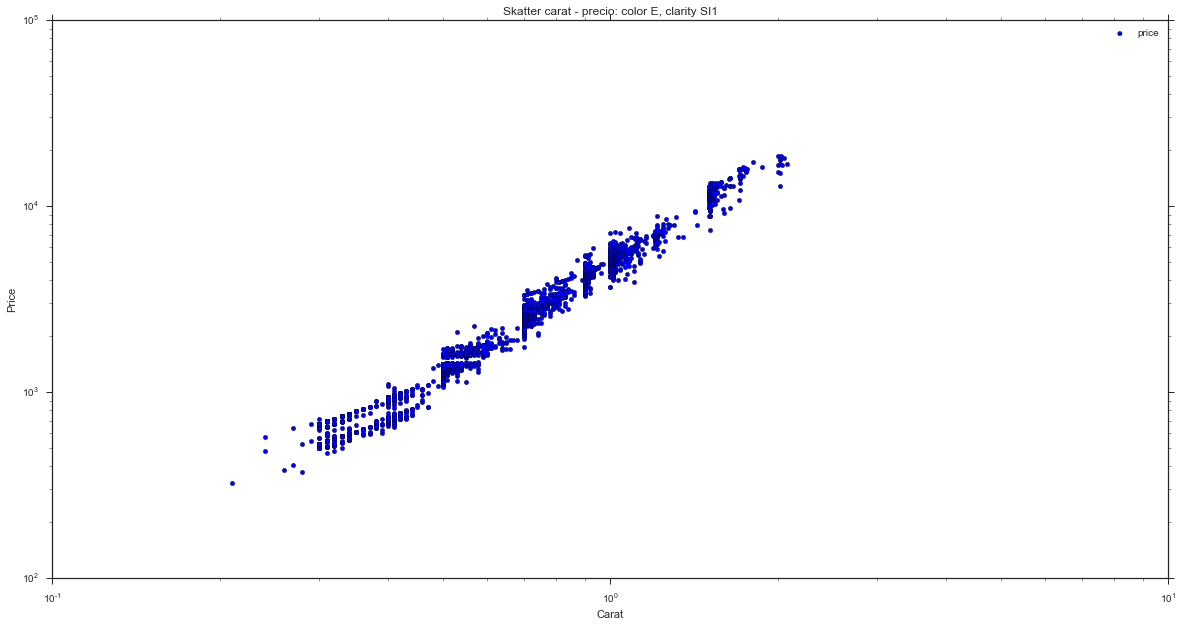

In [28]:
diamonds_E_SI1 = diamonds[(diamonds.color=='E') & (diamonds.clarity=='SI1')]
plt.figure(figsize=(20,10))
plt.scatter(diamonds_E_SI1['carat'],diamonds_E_SI1['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.semilogx()
plt.semilogy()
plt.title('Skatter carat - precio: color E, clarity SI1')
plt.legend()
plt.show()

Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de x, y, z) y el precio, de nuevo en escala logarítmica.

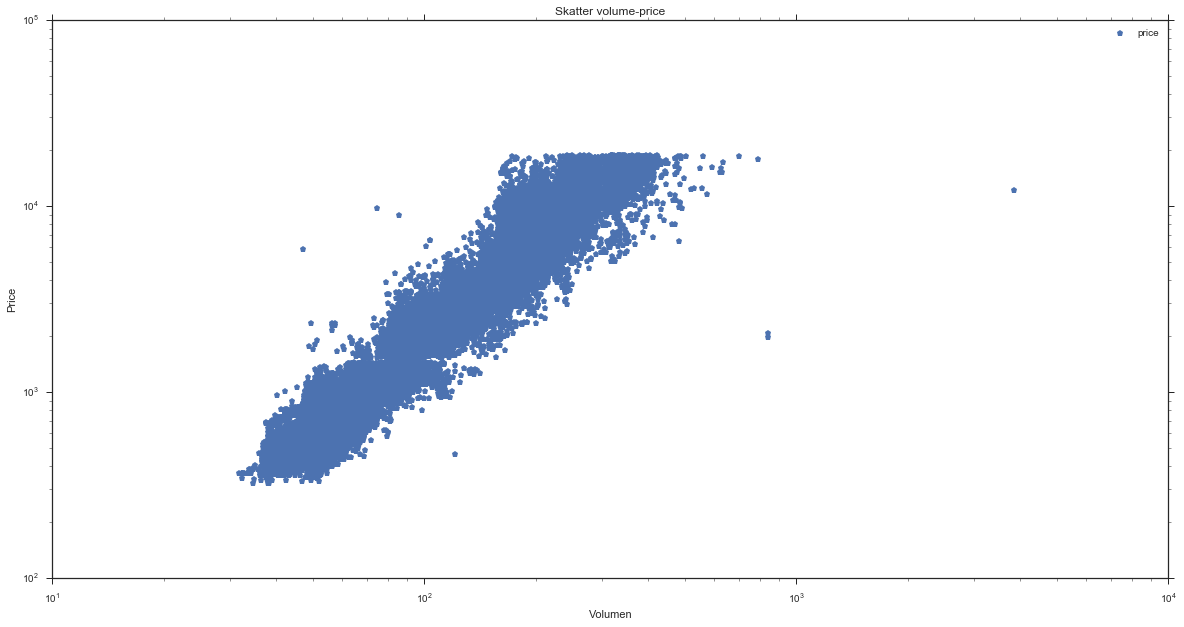

In [29]:
diamonds['volumen'] = diamonds['x']*diamonds['y']*diamonds['z']
plt.figure(figsize=(20,10))
plt.plot(diamonds['volumen'],diamonds['price'], 'p')
plt.xlabel('Volumen')
plt.ylabel('Price')
plt.title('Skatter volume-price')
plt.legend()
plt.semilogx()
plt.semilogy()
plt.show()

Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, tomando solo los 1000 primeros valores del dataset.

In [30]:
mil_diamonds = diamonds.head(1000)

y = mil_diamonds['price']
X = mil_diamonds['x']*mil_diamonds['y']*mil_diamonds['z']
recta = sm.OLS(y,X).fit()
recta.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.720e+04
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        19:42:48   Log-Likelihood:                -7466.0
No. Observations:                1000   AIC:                         1.493e+04
Df Residuals:                     999   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            22.1492      0.115    192.871      0.000        21.924    22.375
==============================================================================
Omnibus:                       57.682   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.875
Skew:                          -0.593   Prob(JB):                     3.01e-15
Kurtosis:                       3.447   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared es muy alta, por lo cual se puede pensar que la regresión ajusta bien.

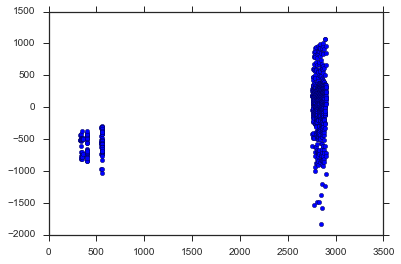

In [31]:
plt.scatter(mil_diamonds["price"],recta.resid) # pinto los residuos

Veo que los residuos no son independientes. El modelo es mejorable.

Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando al diagrama las distribuciones de las dos variables.

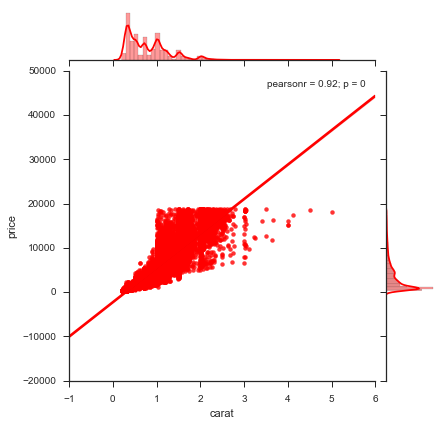

In [32]:
sns.jointplot(x='carat', y='price', data=diamonds, kind="reg", color="red")

Identifica con un comando los diferentes tipos de corte (cut).

In [33]:
print(diamonds["cut"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


Comprueba si hay diferencias significativas en la media del precio para los de corte "Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede asumir que las muestras son de una distribución normal). Puedes investigar funciones lógicas vectorizadas en NumPy como logical_or().

In [33]:
ideal_premium=diamonds[np.logical_or(diamonds["cut"]=="Ideal",diamonds["cut"]=="Premium" )].head(1000)
media_ideal_premium=ideal_premium['price'].mean()
print "Cut ideal o premium: ", ideal_premium.cut.unique(), 'media:', media_ideal_premium
no_ideal_premium = diamonds[np.logical_and(diamonds["cut"]!="Ideal",diamonds["cut"]!="Premium" )].head(1000)
media_no_ideal_premium=no_ideal_premium['price'].mean()
print "Cut no ideal ni premium: ", no_ideal_premium.cut.unique(), 'media', media_no_ideal_premium

fstats = stats.f_oneway(ideal_premium.price, no_ideal_premium.price)
print fstats

Cut ideal o premium:  ['Ideal' 'Premium'] media: 2573.572
Cut no ideal ni premium:  ['Good' 'Very Good' 'Fair'] media 2692.669
F_onewayResult(statistic=11.274216799854969, pvalue=0.00080065432985207657)


F statistic es mayor que p value, por lo cual rechazo la hipótesis que las medias son iguales.

Obtén la mediana del precio por cada valor de la claridad (clarity) y ordena los resultados de manera descendente.

In [35]:
diamonds.groupby(['clarity']).median().sort_values('price',ascending=False).price

clarity
SI2     4072
I1      3344
SI1     2822
VS2     2054
VS1     2005
VVS2    1311
VVS1    1093
IF      1080
Name: price, dtype: int64